In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import ujson as json
import torch


from tqdm import tqdm
import numpy as np
from safetensors import safe_open
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator
# Set font globally to Times New Roman
plt.rcParams['font.family'] = 'DejaVu Serif'
fontsize = 19


In [2]:
with open("/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36/analysts/entropy/0722_0217_llava_v1.5_mme_llava_model_args_3775f6/mme.json", "r") as f:
    data = json.load(f)

In [3]:
data['logs'][0]

{'doc_id': 0,
 'target': 'Yes',
 'doc': {'question_id': 'code_reasoning/0020.png',
  'question': 'Is a python code shown in the picture? Please answer yes or no.',
  'answer': 'Yes',
  'category': 'code_reasoning'},
 'arguments': [['Is a python code shown in the picture?\nAnswer the question using a single word or phrase.',
   0,
   'mme',
   'test']],
 'resps': [['No']],
 'filtered_resps': ['No'],
 'logs_metrics_mlp': [[{'balance_loss': "tensor(1.0810, device='cuda:0')",
    'router_z_loss': "tensor(0.0626, device='cuda:0', dtype=torch.float16)"}]],
 'logs_metrics_vision': [[{'time_inference': 0.1425492763519287,
    '0': {'entropy_weight_topk': 0.9985502362251282,
     'entropy_weight_all': 0.9973273873329163,
     'dist_experts_top1': [1038, 39, 81, 93, 900, 153],
     'dist_experts_top2': [2128, 762, 759, 459, 1767, 1037],
     'balance_loss': 1.057348370552063,
     'router_z_loss': 3.044921875},
    '1': {'entropy_weight_topk': 0.9967339038848877,
     'entropy_weight_all': 0.993

In [4]:

# merger logs results 
root_paths = "/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36"
model_list = [
    "Full_smoe_sigmoidgating",
    "Full_smoe_share",
    "Full_smoe_plus_plus",
    "Full_smoe",
    "Full_smoe_tcmoe",
    "Full_xmoe",
    "Full_smoe_sharev3"
    
    
]
datas = [
    "mme",
    "mmmu_val",
    "mmstar",
    "mathvista_testmini"
]

data_agg = {}
for name_data in datas:
    data_agg[name_data] = {}
    for name_ml in model_list:
        path = f"{root_paths}/{name_ml}/analysts/{name_data}_score_selected_final.json"
        with open(path, "r") as f:
            data = json.load(f)
        try:
            data_agg[name_data][name_ml] = data[name_ml]
            
        except:
            data_agg[name_data][name_ml] = data["revise_" + name_ml]
#             print(name_ml)
#             print(data.keys())
# print(data_agg.keys())
# print(data_agg['mme'].keys())

In [5]:
data_agg

{'mme': {'Full_smoe_sigmoidgating': {'0': {'0': [0.4064803601516428],
    '1': [0.31896105377702894],
    '2': [0.576181199101376],
    '3': [0.5995792087896658],
    '4': [0.613462247262005],
    '5': [0.6414521026397079],
    '6': [0.6207569853973602],
    '7': [0.6403825733642234],
    '8': [0.6554130247823645],
    '9': [0.6476970566554339],
    '10': [0.6337207771693345],
    '11': [0.6320742505616399],
    '12': [0.6557794071187869],
    '13': [0.6508661541701769],
    '14': [0.6515133565009829],
    '15': [0.6764953664700927],
    '16': [0.699201198750351],
    '17': [0.6976610765936534],
    '18': [0.6912844882055602],
    '19': [0.6977992926846391],
    '20': [0.7045422634091547],
    '21': [0.7076290894411681],
    '22': [0.7238683831788822],
    '23': [0.7308439079612469],
    '24': [0.7312881739679865],
    '25': [0.7275486608396516],
    '26': [0.7186227534400449]},
   '1': {'0': [0.4910378931479922],
    '1': [0.281105202190396],
    '2': [0.5529148237854534],
    '3': [0

{'mme': {}, 'mathvista_testmini': {}, 'validate': {}, 'hellaswag': {}}
Full_smoe_sigmoidgating
Full_smoe_share
Full_smoe_sharev3
Full_smoe_plus_plus
Full_smoe
Full_smoe_tcmoe
Full_xmoe
Full_smoe_sigmoidgating
Full_smoe_share
Full_smoe_sharev3
Full_smoe_plus_plus
Full_smoe
Full_smoe_tcmoe
Full_xmoe
Full_smoe_sigmoidgating
Full_smoe_share
Full_smoe_sharev3
Full_smoe_plus_plus
Full_smoe
Full_smoe_tcmoe
Full_xmoe
Full_smoe_sigmoidgating
Full_smoe_share
Full_smoe_sharev3
Full_smoe_plus_plus
Full_smoe
Full_smoe_tcmoe
Full_xmoe
######################
[0 1 2 3 4 5 6 7 8]
[0.7462903645833333, 0.7100221354166667, 0.6848645833333333, 0.65993359375, 0.6297408854166666, 0.59180859375, 0.55158984375, 0.50644921875, 0.4693515625]
9 9
######################
[0 1 2 3 4 5 6 7 8]
[0.7470677083333334, 0.7189270833333333, 0.6982881944444443, 0.6795590277777779, 0.6615902777777778, 0.6282899305555555, 0.6009843750000001, 0.5577708333333332, 0.5356493055555555]
9 9
######################
[0 1 2 3 4 5 6 7 8]


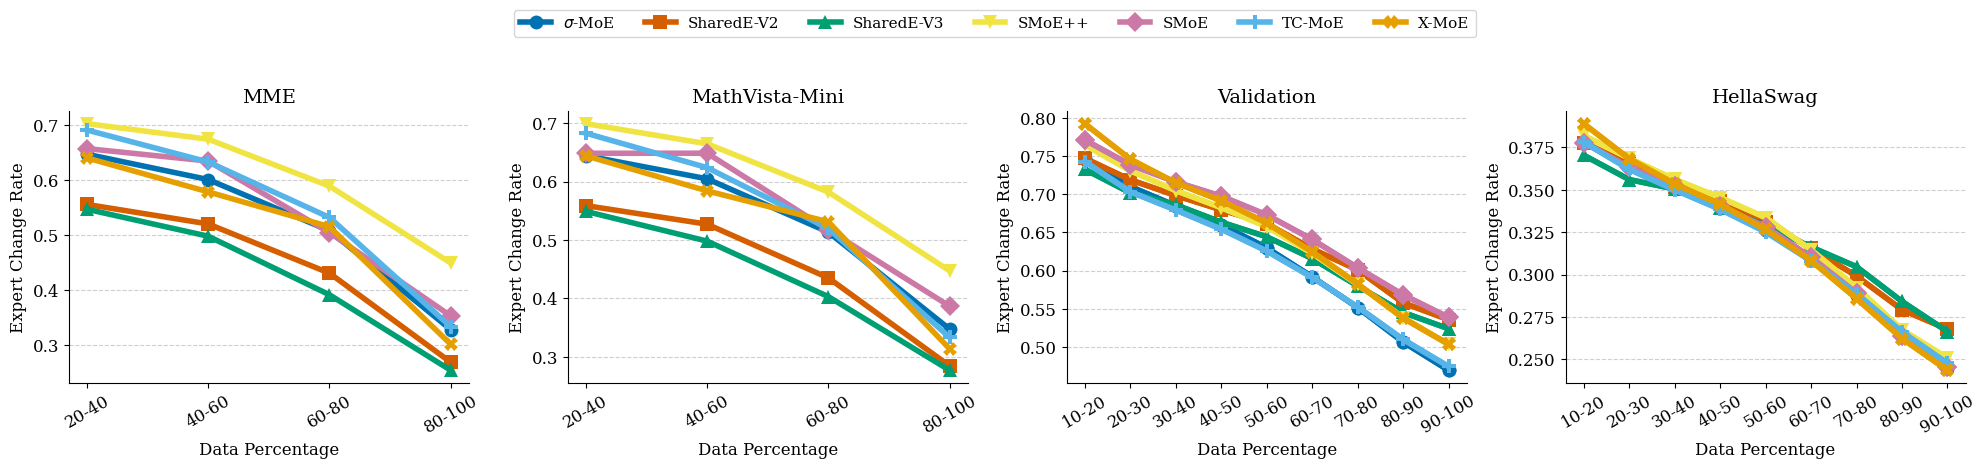

Saved to /cm/shared/anonymous_h100/LibMoE/evaluate/analysis/libmoev2/expert_change_rates.pdf


In [54]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Plot expert-change rates of multiple MoE variants on four multimodal benchmarks.
‒ Colour-blind friendly palette (Okabe-Ito)
‒ Uniform X-axis labels: 20-40 · 40-60 · 60-80 · 80-100
‒ No black border around markers.

Author: Nam (2025-07-21)
"""
import json
from itertools import cycle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

# ========== 1. CẤU HÌNH ========== #
FIG_W, FIG_H        = 20, 4          # figure size (inch)
FONTSIZE_TITLE      = 14
FONTSIZE_LABEL      = 12
FONTSIZE_LEGEND     = 11

root_paths = "/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36"
model_list = [
    "Full_smoe_sigmoidgating",
    "Full_smoe_share",
    "Full_smoe_sharev3",
    "Full_smoe_plus_plus",
    "Full_smoe",
    "Full_smoe_tcmoe",
    "Full_xmoe",
]
datas = ["mme", "mathvista_testmini", "validate", "hellaswag"]

pretty_name = {
    "Full_smoe":               "SMoE",
    "Full_smoe_share":         "SharedE-V2",
    "Full_smoe_sharev3": "SharedE-V3",
    "Full_smoe_sigmoidgating": "$\sigma$-MoE",
    "Full_smoe_plus_plus":     "SMoE++",
    "Full_smoe_tcmoe":         "TC-MoE",
    "Full_xmoe":               "X-MoE",
}

# ---------- Nhãn X cố định ---------- #
x_labels = ["20-40", "40-60", "60-80", "80-100"]
x_labels_pretrain = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80","80-90", "90-100" ]

x_pos    = np.arange(len(x_labels))        # [0, 1, 2, 3]
x_pos_pretrain    = np.arange(len(x_labels_pretrain))        # [0, 1, 2, 3]
def tilt_xticks(ax, rotation=30):
    ax.tick_params(axis='x', labelrotation=rotation)   # xoay nhãn
    # căn phải & giữ điểm neo để đỡ đè nhau
    for t in ax.get_xticklabels():
        t.set_ha('right')
        t.set_rotation_mode('anchor')
# ========== 2. NẠP & TÍNH GIÁ TRỊ ========== #
def load_all_scores() -> dict:
    """Trả về data_agg[data][model] = {percent: {layer: [score,…]}}"""
    data_agg = {d: {} for d in datas}
    print(data_agg)
    for dname in datas:
        for m in model_list:
            
            _new = m.replace("revise_", "")
            print(m)
            jpath = (Path(root_paths) / _new / "analysts" /
                     f"{dname}_score_selected_final.json")
            if not jpath.is_file():
                continue
            with open(jpath) as f:
                raw = json.load(f)
            # print(m)
            # print(raw[m])
            try:
                data_agg[dname][_new] = raw[m]
            except:
                data_agg[dname][_new] = raw["revise_" + m]
    return data_agg


def avg_per_bucket(model_dict: dict):
    """{percent: {layer: [score,…]}} → (mean_list, sorted_perc)"""
    sorted_perc = sorted(model_dict.keys(), key=lambda x: float(x))
    means = [float(np.mean([v[0] for v in model_dict[p].values()]))
             for p in sorted_perc]
    return means, sorted_perc


data_agg = load_all_scores()

plot_values = {d: {} for d in datas}
for d in datas:
    for m in model_list:
        
        try:
            vals, _ = avg_per_bucket(data_agg[d][m])
            # if len(vals) != len(x_labels):
            #     raise ValueError(f"{d}/{m}: expected 4 buckets, got {len(vals)}")
            plot_values[d][m] = vals
        except:
            continue


with open("/cm/shared/anonymous_h100/LibMoE/evaluate/analysis/results/router_change_rate_158m_pretrain_final.json", "r") as f:
    plot_values_pretrain = json.load(f)
    
for k, v in plot_values_pretrain.items():
    plot_values[k] = v
# ========== 3. MÀU & MARKER (Okabe-Ito) ========== #
cvd_palette = [
    "#0072B2", "#D55E00", "#009E73", "#F0E442",
    "#CC79A7", "#56B4E9", "#E69F00", "#000000",
]
markers = cycle(["o", "s", "^", "v", "D", "P", "X", "*"])

method_order  = model_list
method2color  = {m: cvd_palette[i % len(cvd_palette)]
                 for i, m in enumerate(method_order)}
method2marker = {m: next(markers) for m in method_order}

# ========== 4. VẼ HÌNH ========== #
fig, axes = plt.subplots(1, 4, figsize=(FIG_W, FIG_H))

title_map = {
    "mme": "MME",
    "mmmu_val": "MMMU-Val",
    "mmstar": "MMStar",
    "mathvista_testmini": "MathVista-Mini",
    "blimp": "BLiMP",
    "hellaswag": "HellaSwag",
    "validate": "Validation"
}

for i, dname in enumerate(datas):
    # if i == 2: break
    ax = axes[i]
    for m in method_order:
        x_pos    = np.arange(len(plot_values[dname][m]))
        try:
            
            ax.plot(
                x_pos,
                plot_values[dname][m],
                label=pretty_name.get(m, m),
                color=method2color[m],
                marker=method2marker[m],
                linewidth=4,
                markersize=10,
                markeredgewidth=0,          # bỏ viền
            )
            ax.set_title(title_map.get(dname, dname), fontsize=FONTSIZE_TITLE)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(x_labels, fontsize=FONTSIZE_LABEL)
            ax.tick_params(axis='x', labelrotation=30)

            ax.set_xlabel("Data Percentage", fontsize=FONTSIZE_LABEL)
            # if i == 0:
            ax.set_ylabel("Expert Change Rate", fontsize=FONTSIZE_LABEL)
            ax.yaxis.grid(True, linestyle="--", alpha=.6)
            ax.tick_params(axis="y", labelsize=FONTSIZE_LABEL)
            ax.spines[["right", "top"]].set_visible(False)
        except:
            ax.plot(
                x_pos,
                plot_values[dname][m],
                label=pretty_name.get(m, m),
                color=method2color[m],
                marker=method2marker[m],
                linewidth=4,
                markersize=10,
                markeredgewidth=0,          # bỏ viền
            )
            
            ax.set_title(title_map.get(dname, dname), fontsize=FONTSIZE_TITLE)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(x_labels_pretrain, fontsize=FONTSIZE_LABEL)
            ax.tick_params(axis='x', labelrotation=30)

            ax.set_xlabel("Data Percentage", fontsize=FONTSIZE_LABEL)
            # if i == 0:
            ax.set_ylabel("Expert Change Rate", fontsize=FONTSIZE_LABEL)
            ax.yaxis.grid(True, linestyle="--", alpha=.6)
            ax.tick_params(axis="y", labelsize=FONTSIZE_LABEL)
            ax.spines[["right", "top"]].set_visible(False)
            print("######################")
            print(x_pos)
            print(plot_values[dname][m])
            print(len(x_pos), len(plot_values[dname][m]))


# ---------- 5. LEGEND ---------- #
handles, labels = [], []
for m in method_order:
    handles.append(plt.Line2D(
        [], [], linestyle="-", linewidth=4,
        color=method2color[m], marker=method2marker[m],
        markersize=10, markeredgewidth=0,
        label=pretty_name.get(m, m)))
    labels.append(pretty_name.get(m, m))

fig.legend(handles, labels, loc="upper center",
           ncol=len(method_order), fontsize=FONTSIZE_LEGEND,
           bbox_to_anchor=(0.5, 1.18))

plt.tight_layout()
out_path = Path("expert_change_rates.pdf")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved to {out_path.resolve()}")


{'validate': {}, 'hellaswag': {}}
Full_smoe_sigmoidgating
Full_smoe_share
Full_smoe_sharev3
Full_smoe_plus_plus
Full_smoe
Full_smoe_tcmoe
Full_xmoe
Full_smoe_share_upcycling
Full_smoe_sigmoidgating
Full_smoe_share
Full_smoe_sharev3
Full_smoe_plus_plus
Full_smoe
Full_smoe_tcmoe
Full_xmoe
Full_smoe_share_upcycling
######################
[0 1 2 3 4 5 6 7 8]
[0.7462903645833333, 0.7100221354166667, 0.6848645833333333, 0.65993359375, 0.6297408854166666, 0.59180859375, 0.55158984375, 0.50644921875, 0.4693515625]
9 9
######################
[0 1 2 3 4 5 6 7 8]
[0.7470677083333334, 0.7189270833333333, 0.6982881944444443, 0.6795590277777779, 0.6615902777777778, 0.6282899305555555, 0.6009843750000001, 0.5577708333333332, 0.5356493055555555]
9 9
######################
[0 1 2 3 4 5 6 7 8]
[0.7326059027777777, 0.7018194444444443, 0.6861024305555553, 0.6634149305555556, 0.644234375, 0.6157743055555556, 0.5799583333333335, 0.54509375, 0.523842013888889]
9 9
######################
[0 1 2 3 4 5 6 7 8]
[

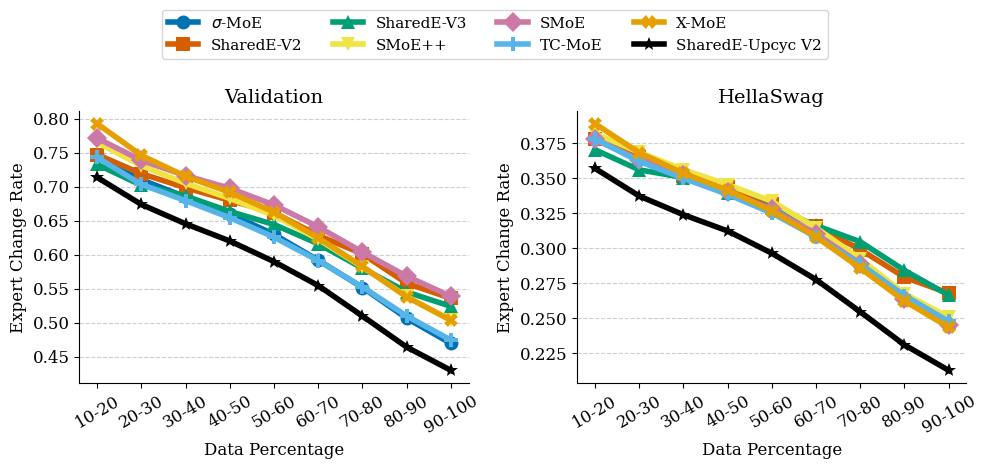

Saved to /cm/shared/anonymous_h100/LibMoE/evaluate/analysis/libmoev2/expert_change_rates_shareE_inve.pdf


In [55]:
FIG_W, FIG_H        = 10, 4
root_paths = "/cm/archive/anonymous_new/revise_checkpoints/Xphi35-siglip224/SMOE/665K36"
model_list = [
    "Full_smoe_sigmoidgating",
    "Full_smoe_share",
    
    "Full_smoe_sharev3",
    "Full_smoe_plus_plus",
    "Full_smoe",
    "Full_smoe_tcmoe",
    "Full_xmoe",
    "Full_smoe_share_upcycling",
    
]
datas = ["validate", "hellaswag"]

pretty_name = {
    "Full_smoe":               "SMoE",
    "Full_smoe_share":         "SharedE-V2",
    "Full_smoe_sharev3": "SharedE-V3",
    "Full_smoe_sigmoidgating": "$\sigma$-MoE",
    "Full_smoe_plus_plus":     "SMoE++",
    "Full_smoe_tcmoe":         "TC-MoE",
    "Full_xmoe":               "X-MoE",
    "Full_smoe_share_upcycling": "SharedE-Upcyc V2",
}

# ---------- Nhãn X cố định ---------- #
x_labels = ["20-40", "40-60", "60-80", "80-100"]
# x_labels_pretrain = ["10-20", "20-30", "30-40", "40-50"]
x_labels_pretrain = ["10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80","80-90", "90-100" ]

x_pos    = np.arange(len(x_labels))        # [0, 1, 2, 3]
x_pos_pretrain    = np.arange(len(x_labels_pretrain))        # [0, 1, 2, 3]

# ========== 2. NẠP & TÍNH GIÁ TRỊ ========== #
def load_all_scores() -> dict:
    """Trả về data_agg[data][model] = {percent: {layer: [score,…]}}"""
    data_agg = {d: {} for d in datas}
    print(data_agg)
    for dname in datas:
        for m in model_list:
            
            _new = m.replace("revise_", "")
            print(m)
            jpath = (Path(root_paths) / _new / "analysts" /
                     f"{dname}_score_selected_final.json")
            if not jpath.is_file():
                continue
            with open(jpath) as f:
                raw = json.load(f)
            # print(m)
            # print(raw[m])
            try:
                data_agg[dname][_new] = raw[m]
            except:
                data_agg[dname][_new] = raw["revise_" + m]
    return data_agg


def avg_per_bucket(model_dict: dict):
    """{percent: {layer: [score,…]}} → (mean_list, sorted_perc)"""
    sorted_perc = sorted(model_dict.keys(), key=lambda x: float(x))
    means = [float(np.mean([v[0] for v in model_dict[p].values()]))
             for p in sorted_perc]
    return means, sorted_perc


data_agg = load_all_scores()

plot_values = {d: {} for d in datas}
# for d in datas:
#     for m in model_list:
        
#         try:
#             vals, _ = avg_per_bucket(data_agg[d][m])
#             # if len(vals) != len(x_labels):
#             #     raise ValueError(f"{d}/{m}: expected 4 buckets, got {len(vals)}")
#             plot_values[d][m] = vals
#         except:
#             continue


with open("/cm/shared/anonymous_h100/LibMoE/evaluate/analysis/results/router_change_rate_158m_pretrain_final1.json", "r") as f:
    plot_values_pretrain = json.load(f)
    
for k, v in plot_values_pretrain.items():
    plot_values[k] = v
# ========== 3. MÀU & MARKER (Okabe-Ito) ========== #
cvd_palette = [
    "#0072B2", "#D55E00", "#009E73", "#F0E442",
    "#CC79A7", "#56B4E9", "#E69F00", "#000000",
]
markers = cycle(["o", "s", "^", "v", "D", "P", "X", "*"])

method_order  = model_list
method2color  = {m: cvd_palette[i % len(cvd_palette)]
                 for i, m in enumerate(method_order)}
method2marker = {m: next(markers) for m in method_order}

# ========== 4. VẼ HÌNH ========== #
fig, axes = plt.subplots(1, 2, figsize=(FIG_W, FIG_H))

title_map = {
    "mme": "MME",
    "mmmu_val": "MMMU-Val",
    "mmstar": "MMStar",
    "mathvista_testmini": "MathVista-Mini",
    "blimp": "BLiMP",
    "hellaswag": "HellaSwag",
    "validate": "Validation"
}

for i, dname in enumerate(datas):
    # if i == 2: break
    ax = axes[i]
    
    for m in method_order:
        plot_values[dname][m] = plot_values[dname][m]
        x_pos    = np.arange(len(plot_values[dname][m]))
       
        ax.plot(
            x_pos,
            plot_values[dname][m],
            label=pretty_name.get(m, m),
            color=method2color[m],
            marker=method2marker[m],
            linewidth=4,
            markersize=10,
            markeredgewidth=0,          # bỏ viền
        )
        
        ax.set_title(title_map.get(dname, dname), fontsize=FONTSIZE_TITLE)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(x_labels_pretrain, fontsize=FONTSIZE_LABEL)
        ax.tick_params(axis='x', labelrotation=30)
        ax.set_xlabel("Data Percentage", fontsize=FONTSIZE_LABEL)
        # if i == 0:
        ax.set_ylabel("Expert Change Rate", fontsize=FONTSIZE_LABEL)
        ax.yaxis.grid(True, linestyle="--", alpha=.6)
        ax.tick_params(axis="y", labelsize=FONTSIZE_LABEL)
        ax.spines[["right", "top"]].set_visible(False)
        print("######################")
        print(x_pos)
        print(plot_values[dname][m])
        print(len(x_pos), len(plot_values[dname][m]))

    

# ---------- 5. LEGEND ---------- #
handles, labels = [], []
for m in method_order:
    handles.append(plt.Line2D(
        [], [], linestyle="-", linewidth=4,
        color=method2color[m], marker=method2marker[m],
        markersize=10, markeredgewidth=0,
        label=pretty_name.get(m, m)))
    labels.append(pretty_name.get(m, m))

fig.legend(handles, labels, loc="upper center",
           ncol=int(len(method_order)/2), fontsize=FONTSIZE_LEGEND,
           bbox_to_anchor=(0.5, 1.18))

plt.tight_layout()
out_path = Path("expert_change_rates_shareE_inve.pdf")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved to {out_path.resolve()}")


In [41]:
method_order

['Full_smoe_sigmoidgating',
 'Full_smoe_share',
 'Full_smoe_sharev3',
 'Full_smoe_plus_plus',
 'Full_smoe',
 'Full_smoe_tcmoe',
 'Full_xmoe',
 'Full_smoe_share_upcycling']

In [24]:
m

'Full_smoe_share_upcyclingFull_smoe_sharev3'

In [26]:
model_list

['Full_smoe_sigmoidgating',
 'Full_smoe_share',
 'Full_smoe_share_upcyclingFull_smoe_sharev3',
 'Full_smoe_plus_plus',
 'Full_smoe',
 'Full_smoe_tcmoe',
 'Full_xmoe']